In [1]:
pip install numpy pandas matplotlib seaborn tensorflow scikit-learn kaggle


  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ------------

In [3]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam


In [5]:
# Veri setlerini yükleyelim
train_data = pd.read_csv('train.csv')  # Eğitim verisi
test_data = pd.read_csv('test.csv')    # Test verisi


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [7]:
import os
print(os.getcwd())


C:\Users\senan


In [9]:
# Veri setlerini doğru dosya yollarıyla yükleyelim
train_data = pd.read_csv(r'C:\Users\senan\train.csv')  # Eğitim verisi
test_data = pd.read_csv(r'C:\Users\senan\test.csv')    # Test verisi


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\senan\\train.csv'

In [11]:
train_data = pd.read_csv(r'C:\Users\senan\train.csv')  # Eğitim verisi
test_data = pd.read_csv(r'C:\Users\senan\test.csv')    # Test verisi


In [13]:
# Eğitim verisinin ilk 5 satırını görüntüle
print(train_data.head())

# Test verisinin ilk 5 satırını görüntüle
print(test_data.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [15]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [17]:
print(train_data.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [19]:
print(train_data['label'].value_counts())


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


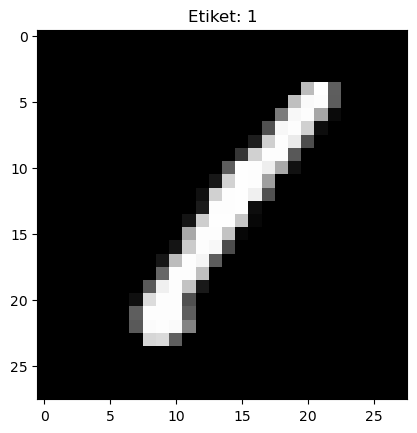

In [21]:
# İlk görüntüyü çizelim (matris formatında)
import matplotlib.pyplot as plt

# Görüntü formatını yeniden şekillendir (28x28 piksel)
ilk_resim = train_data.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(ilk_resim, cmap='gray')
plt.title(f"Etiket: {train_data.iloc[0, 0]}")
plt.show()


In [23]:
# Etiketleri ve özellikleri ayır
X = train_data.iloc[:, 1:].values  # Görüntü pikselleri
y = train_data.iloc[:, 0].values  # Etiketler


In [25]:
X = X / 255.0  # Piksel değerlerini 0-1 arasına getir


In [27]:
from sklearn.model_selection import train_test_split

# Eğitim ve doğrulama setlerine ayır
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from tensorflow.keras.utils import to_categorical

# Etiketleri kategorik formata çevir
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)


In [31]:
# CNN için yeniden şekillendir (28x28x1 formatı)
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)


In [33]:
print("Eğitim verisi boyutları (X_train):", X_train.shape)
print("Doğrulama verisi boyutları (X_val):", X_val.shape)
print("Eğitim etiket boyutları (y_train):", y_train.shape)
print("Doğrulama etiket boyutları (y_val):", y_val.shape)


Eğitim verisi boyutları (X_train): (33600, 28, 28, 1)
Doğrulama verisi boyutları (X_val): (8400, 28, 28, 1)
Eğitim etiket boyutları (y_train): (33600, 10)
Doğrulama etiket boyutları (y_val): (8400, 10)


In [35]:
print("X_train min değeri:", X_train.min())
print("X_train max değeri:", X_train.max())


X_train min değeri: 0.0
X_train max değeri: 1.0


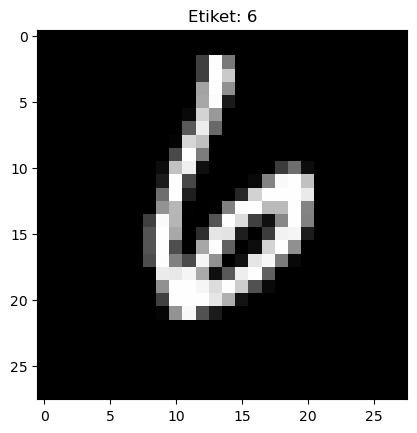

In [37]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Etiket: {np.argmax(y_train[0])}")  # One-hot encoding olduğu için argmax kullanıyoruz
plt.show()


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN modeli oluşturma
model = Sequential()

# İlk evrişim (convolution) katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# İkinci evrişim katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten katmanı
model.add(Flatten())

# Tam bağlı (dense) katman
model.add(Dense(128, activation='relu'))

# Çıkış katmanı
model.add(Dense(10, activation='softmax'))


C:\Users\senan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN modeli oluşturma
model = Sequential()

# İlk evrişim (convolution) katmanı
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# İkinci evrişim katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten katmanı
model.add(Flatten())

# Tam bağlı (dense) katman
model.add(Dense(128, activation='relu'))

# Çıkış katmanı
model.add(Dense(10, activation='softmax'))


C:\Users\senan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Modeli eğitme
history = model.fit(
    X_train, y_train,  # Eğitim verisi ve etiketleri
    validation_data=(X_val, y_val),  # Doğrulama verisi
    epochs=10,  # Eğitim süresi (daha fazla artırabilirsiniz)
    batch_size=32  # Mini-batch boyutu
)


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8837 - loss: 0.3849 - val_accuracy: 0.9793 - val_loss: 0.0636
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9833 - loss: 0.0526 - val_accuracy: 0.9799 - val_loss: 0.0638
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9865 - val_loss: 0.0404
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.9886 - val_loss: 0.0356
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9950 - loss: 0.0167 - val_accuracy: 0.9893 - val_loss: 0.0358
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9895 - val_loss: 0.0340
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9968 - loss: 0.0108 - val_accuracy: 0.9885 - val_loss: 0.0412
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9963 - loss: 0.0097 

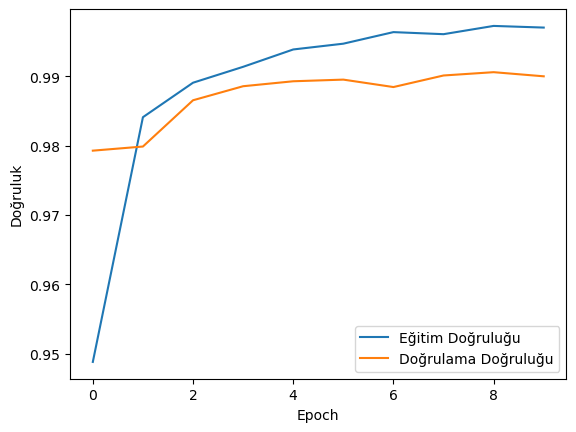

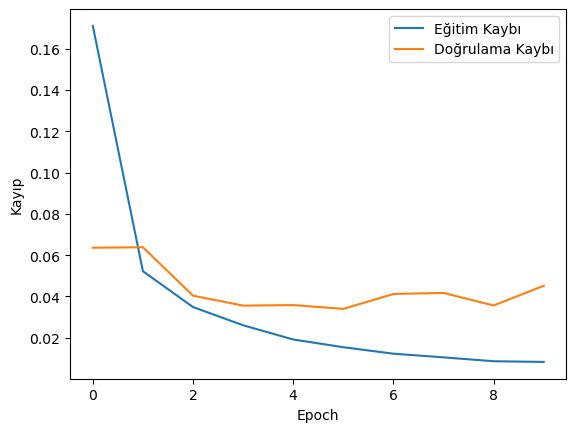

In [49]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğrulukları
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kayıpları
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [51]:
X_test = test_data.values / 255.0  # Normalizasyon
X_test = X_test.reshape(-1, 28, 28, 1)  # Yeniden şekillendirme


In [53]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [55]:
print("Tahmin Edilen Etiketler:", predicted_labels[:10])


Tahmin Edilen Etiketler: [2 0 9 9 3 7 0 3 0 3]


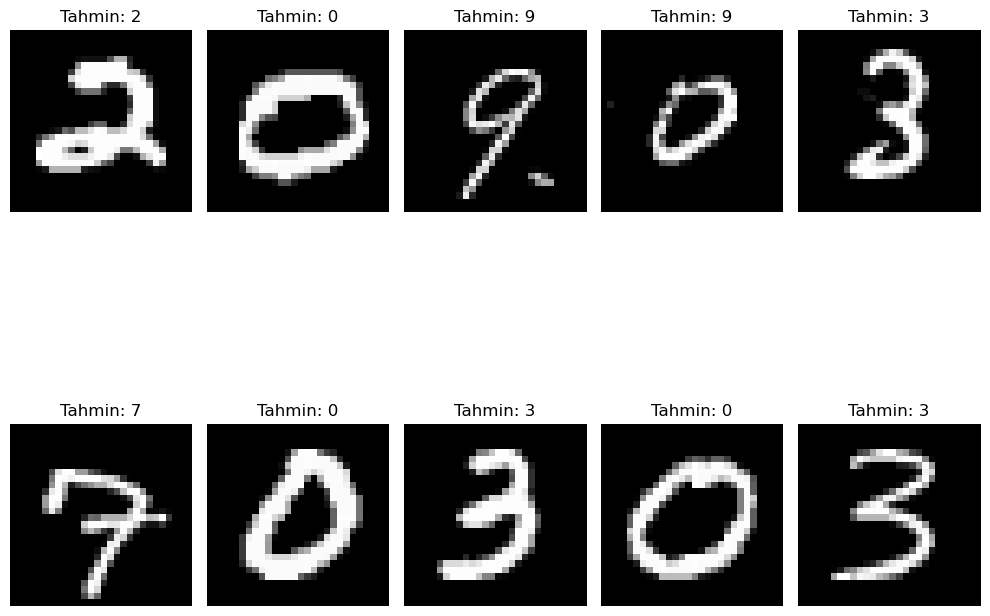

In [57]:
# İlk 10 tahmini görselleştirme
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Tahmin: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [59]:
val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
print(f"Doğrulama doğruluğu: {val_accuracy * 100:.2f}%")


Doğrulama doğruluğu: 99.00%


In [61]:
model.save('digit_recognizer_model.h5')  # Modeli HDF5 formatında kaydet


In [63]:
from tensorflow.keras.models import load_model

# Kaydedilen modeli yükleme
model = load_model('digit_recognizer_model.h5')


In [65]:
# Kaggle sonuç dosyası oluşturma
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})
submission.to_csv('submission.csv', index=False)
print("Tahminler submission.csv dosyasına kaydedildi!")


Tahminler submission.csv dosyasına kaydedildi!


In [67]:
import os
print(os.getcwd())


C:\Users\senan
